In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Грибосики фрейм

In [32]:
df = pd.read_csv('training_mush.csv')

In [33]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [34]:
X = df.drop(['class'], axis=1)
y = df['class']

rf = RandomForestClassifier(random_state=0, n_jobs=-1)

parameters = {'n_estimators': range(10,50,10), 'max_depth': range(1,12,2),
             'min_samples_leaf': range(1,7), 'min_samples_split': range(2,9,2)}

grid_rf = GridSearchCV(rf, parameters, cv=3)

In [42]:
grid_rf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [43]:
grid_rf.score(X, y)

1.0

In [44]:
grid_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

<AxesSubplot:>

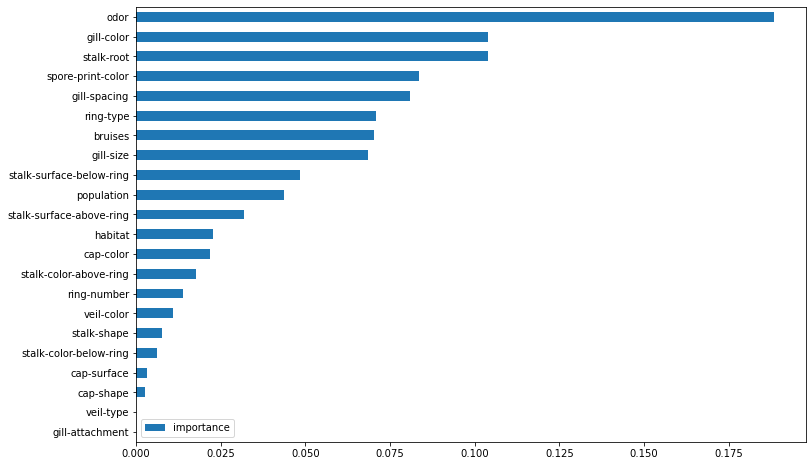

In [45]:
imp = pd.DataFrame(grid_rf.best_estimator_.feature_importances_, index=X.columns, 
                   columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [46]:
df_test = pd.read_csv('testing_mush.csv')

In [48]:
X_test = df_test

In [49]:
y_pred = grid_rf.predict(X_test)

In [58]:
list(y_pred).count(1)

976

In [63]:
y_ans = pd.read_csv('testing_y_mush.csv')

In [71]:
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [64]:
y_ans

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


<AxesSubplot:>

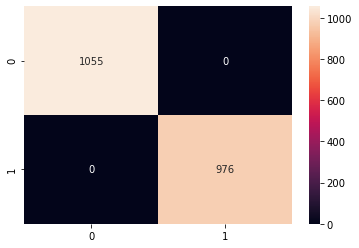

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_ans, y_pred)
sns.heatmap(cm, annot=True, fmt='d')


In [79]:
df_cm

,0,1
0,1055,0
1,0,976


# Вторжение фрейм

In [84]:
df_inv = pd.read_csv('invasion.csv')

In [85]:
df_inv

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [87]:
X = df_inv.drop(['class'], axis=1)
y = df_inv['class']

rf = RandomForestClassifier(random_state=0, n_jobs=-1)

parameters = {'n_estimators': range(10,30,10), 'max_depth': range(3,12,2),
             'min_samples_leaf': range(1,7), 'min_samples_split': range(2,9,2)}

grid_rf = GridSearchCV(rf, parameters, cv=3)

In [88]:
grid_rf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 30, 10)})

In [89]:
grid_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [90]:
grid_rf.score(X, y)

1.0

In [105]:
X_inv_test = pd.read_csv('operative_information.csv')

In [106]:
inv_pred = grid_rf.predict(X_inv_test)

In [107]:
pd.Series(inv_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

<AxesSubplot:>

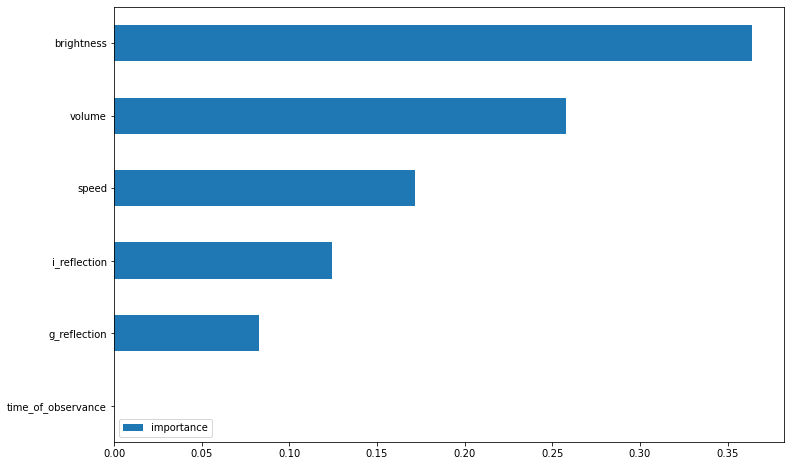

In [108]:
imp = pd.DataFrame(grid_rf.best_estimator_.feature_importances_, index=X.columns, 
                   columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [111]:
df_mars = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [112]:
df_mars

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [147]:
X = df_mars.drop(['dangerous'], axis=1)
y = df_mars['dangerous']

rf = RandomForestClassifier(random_state=0, n_jobs=-1)

parameters = {'n_estimators': range(20,50,10), 'max_depth': range(20,50,10)}

grid_rf = GridSearchCV(rf, parameters, cv=3)

In [148]:
grid_rf.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'max_depth': range(20, 50, 10),
                         'n_estimators': range(20, 50, 10)})

In [154]:
grid_rf.score(X,y)

0.93985

In [150]:
grid_rf.best_params_

{'max_depth': 20, 'n_estimators': 20}

In [151]:
rf0 = RandomForestClassifier(40, max_depth=30, random_state=0, n_jobs=-1)
rf0.fit(X,y)

RandomForestClassifier(max_depth=30, n_estimators=40, n_jobs=-1, random_state=0)

In [152]:
rf0.score(X,y)

0.95938

<AxesSubplot:>

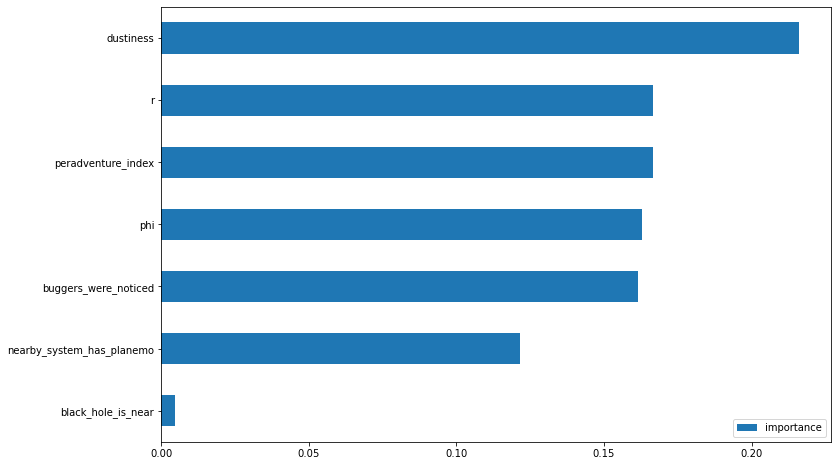

In [155]:
imp = pd.DataFrame(rf0.feature_importances_, index=X.columns, 
                   columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

<AxesSubplot:>

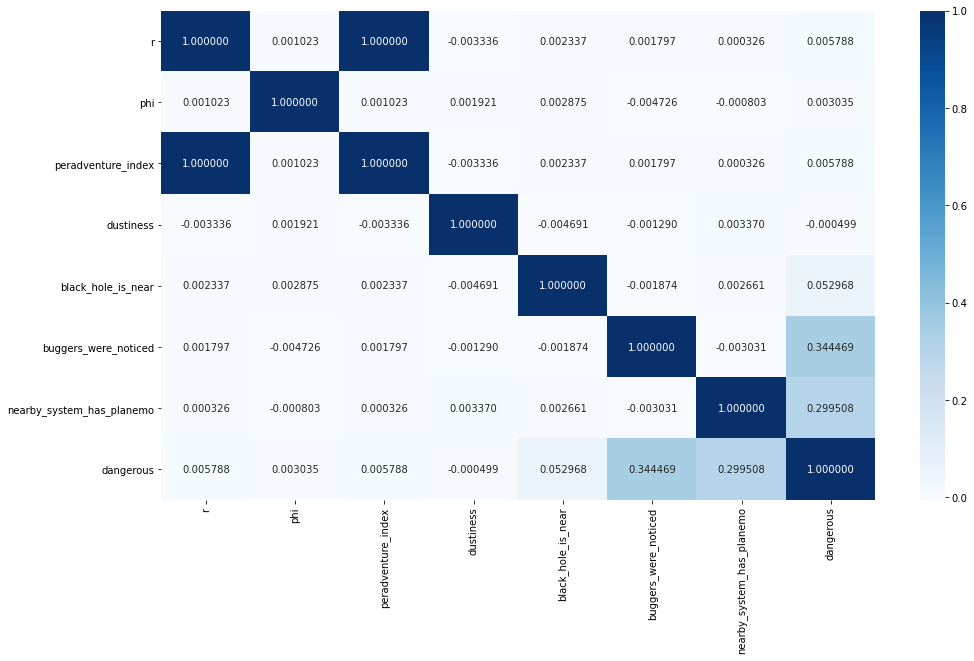

In [164]:
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(df_mars.corr(), annot=True, cmap=plt.cm.Blues, fmt='f')